## Importing Model

`resnet50_2020-07-20` is being used using retinaface (multibox detection model).

In [4]:
%pip install retinaface-pytorch

In [5]:
from matplotlib import pyplot as plt
from retinaface.pre_trained_models import get_model
from retinaface.utils import vis_annotations
import torch

In [6]:
import zipfile
from pathlib import Path

zip_path = Path("img-set-1.zip")

# Specify the directory where you want to extract the files
extract_path = Path("")

# Create a ZipFile object and extract
main_path = Path("img-set-1")
if not main_path.exists():
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)


    # Renaming these files as their path was too long for git
    file1_name = main_path / Path(r"multicultural-love-relationships-concept-white-woman-lying-bed-with-two-dark-skinned-men-indoor-portrait-interracial-friends-two-male-african-guys-relaxing-with-their-girlfriend-bed_149066-2171.jpg")
    file2_name = main_path / Path(r"multicultural-love-relationships-concept-white-woman-lying-bed-with-two-dark-skinned-men-indoor-portrait-interracial-friends-two-male-african-guys-relaxing-with-their-girlfriend-bed_149066-2171-rot.jpg")
    file1_name.rename(main_path / Path("multicultural-love-relationships-concept-white-woman-lying-bed-with-two-dark-skinned-men-indoor-portrait_149066-2171.jpg"))
    file2_name.rename(main_path / Path("multicultural-love-relationships-concept-white-woman-lying-bed-with-two-dark-skinned-men-indoor-portrait_149066-2171-rot.jpg"))

    print(f"Zip file extracted to: {extract_path}")

Zip file extracted to: .


In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [8]:
from pathlib import Path
import numpy as np
from PIL import Image, ImageOps


main_path = Path("img-set-1")
all_images = list(main_path.glob("*jp*"))

img = Image.open(all_images[2])
img = ImageOps.exif_transpose(img)
img_array = np.array(img)


In [9]:
all_images

[PosixPath('img-set-1/overjoyed-young-diverse-dancers-team-600nw-2095291132.jpg'),
 PosixPath('img-set-1/istockphoto-1368965646-612x612-rot.jpg'),
 PosixPath('img-set-1/istockphoto-1346125184-612x612.jpg'),
 PosixPath('img-set-1/wedding-in-france-54-2.jpg'),
 PosixPath('img-set-1/fb-6d6fc3e80d01480d9bff4d85d0672eab.jpg'),
 PosixPath('img-set-1/free-photo-of-woman-lying-face-down-on-bed-2.jpeg'),
 PosixPath('img-set-1/627718c232c1ab1dcf847fd823051970.jpg'),
 PosixPath('img-set-1/2PM_2015_Cosmopolitan.jpg'),
 PosixPath('img-set-1/LE-SSERAFIM-workout-zz-240229-6368b1-rot.jpg'),
 PosixPath('img-set-1/administration-adults-city-175697-2-1-2.jpg'),
 PosixPath('img-set-1/istockphoto-1344872631-612x612.jpg'),
 PosixPath('img-set-1/shadow-photo-african-mother-baby-ethiopian-young-holding-her-days-old-little-against-dark-background-199283662.jpg.webp'),
 PosixPath('img-set-1/mom-dad-posing-at-baby-shower.jpg'),
 PosixPath('img-set-1/e168873c-ef94-4328-958f-71320228a656.jpeg.avif'),
 PosixPath('i

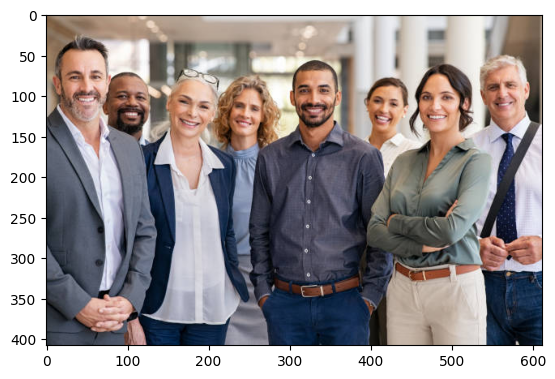

In [10]:
plt.imshow(img_array)

In [11]:
model = get_model("resnet50_2020-07-20", max_size=2048, device=device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://github.com/ternaus/retinaface/releases/download/0.01/retinaface_resnet50_2020-07-20-f168fae3c.zip" to /root/.cache/torch/hub/checkpoints/retinaface_resnet50_2020-07-20-f168fae3c.zip
100%|██████████| 96.9M/96.9M [00:02<00:00, 36.6MB/s]
/usr/local/lib/python3.11/dist-packages/torch/hub.py:870: FutureWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it i

In [12]:
model.eval()

annotation = model.predict_jsons(img_array, confidence_threshold=0.9)
annotation

[{'bbox': [18, 43, 74, 127],
  'score': np.float64(0.9999428987503052),
  'landmarks': [[35, 77], [61, 77], [51, 93], [36, 102], [62, 101]]},
 {'bbox': [460, 76, 510, 145],
  'score': np.float64(0.9996854066848755),
  'landmarks': [[470, 102], [494, 102], [478, 115], [470, 124], [494, 124]]},
 {'bbox': [226, 93, 266, 147],
  'score': np.float64(0.999679446220398),
  'landmarks': [[238, 112], [258, 116], [247, 124], [235, 130], [254, 134]]},
 {'bbox': [306, 68, 357, 135],
  'score': np.float64(0.999679446220398),
  'landmarks': [[319, 93], [343, 94], [330, 106], [319, 116], [343, 115]]},
 {'bbox': [153, 84, 207, 151],
  'score': np.float64(0.9996161460876465),
  'landmarks': [[171, 108], [195, 115], [181, 125], [165, 129], [189, 134]]},
 {'bbox': [397, 89, 440, 144],
  'score': np.float64(0.9995525479316711),
  'landmarks': [[409, 106], [429, 110], [417, 119], [406, 125], [426, 128]]},
 {'bbox': [77, 79, 126, 141],
  'score': np.float64(0.9983518123626709),
  'landmarks': [[94, 101], [1

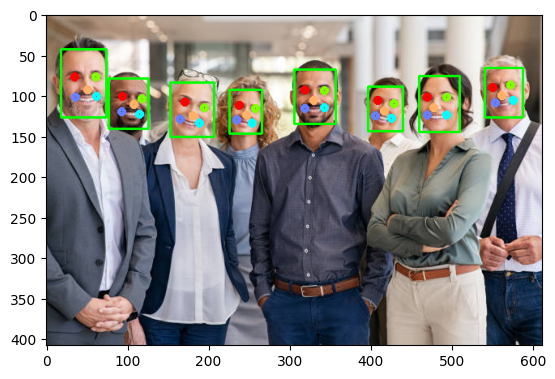

In [13]:
plt.imshow(vis_annotations(img_array, annotation))

## Expanding bbox to better capture the whole face

In [14]:
def expand_bbox(bbox, scale=1.5):
    x_min, y_min, x_max, y_max = bbox
    center_x = (x_min + x_max) / 2
    center_y = (y_min + y_max) / 2
    width = x_max - x_min
    height = y_max - y_min
    new_width = width * scale
    new_height = height * scale
    new_x_min = center_x - new_width / 2
    new_x_max = center_x + new_width / 2
    new_y_min = center_y - new_height / 2
    new_y_max = center_y + new_height / 2
    return [int(new_x_min), int(new_y_min), int(new_x_max), int(new_y_max)]


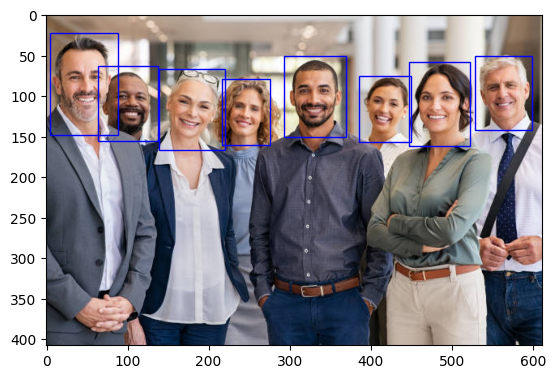

In [15]:
import matplotlib.patches as patch

# Adding some padding to the bounding box

for i in range(len(annotation)):
    annotation[i]['bbox'] = expand_bbox(annotation[i]['bbox'])

plt.imshow(img_array)

for a in annotation:
    bbox = a['bbox']
    xy = (bbox[0], bbox[1])
    width = int(abs(bbox[0] - bbox[2]))
    height = int(abs(bbox[1] - bbox[3]))
    rect = patch.Rectangle(xy, width, height, linewidth=1, edgecolor='b', facecolor='none')
    plt.gca().add_patch(rect)


## Main Loop

  0%|          | 0/30 [00:00<?, ?it/s]

img-set-1/overjoyed-young-diverse-dancers-team-600nw-2095291132.jpg


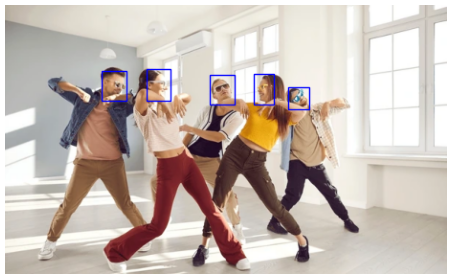

  3%|▎         | 1/30 [00:00<00:25,  1.15it/s]

img-set-1/istockphoto-1368965646-612x612-rot.jpg


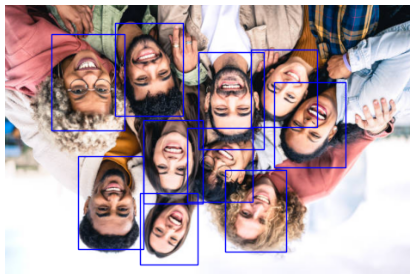

  7%|▋         | 2/30 [00:01<00:19,  1.43it/s]

img-set-1/istockphoto-1346125184-612x612.jpg


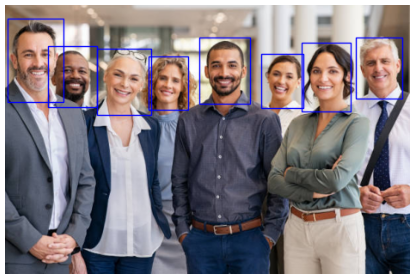

 10%|█         | 3/30 [00:02<00:17,  1.54it/s]

img-set-1/wedding-in-france-54-2.jpg


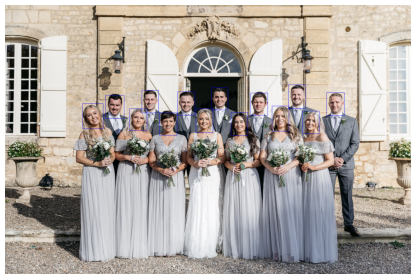

 13%|█▎        | 4/30 [00:04<00:36,  1.39s/it]

img-set-1/fb-6d6fc3e80d01480d9bff4d85d0672eab.jpg


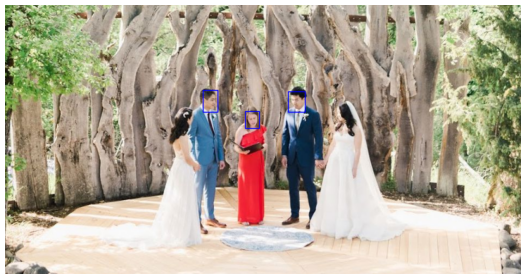

 17%|█▋        | 5/30 [00:05<00:29,  1.18s/it]

img-set-1/free-photo-of-woman-lying-face-down-on-bed-2.jpeg


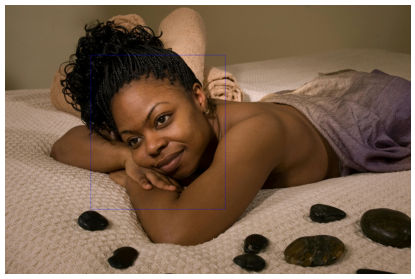

 20%|██        | 6/30 [00:09<00:50,  2.09s/it]

img-set-1/627718c232c1ab1dcf847fd823051970.jpg


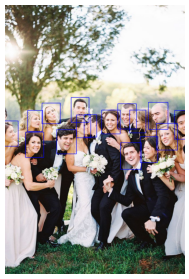

 23%|██▎       | 7/30 [00:10<00:38,  1.69s/it]

img-set-1/2PM_2015_Cosmopolitan.jpg


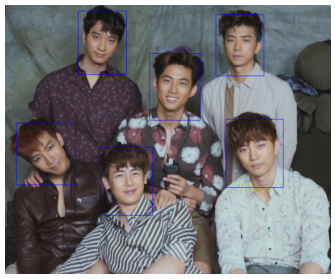

 27%|██▋       | 8/30 [00:11<00:33,  1.50s/it]

img-set-1/LE-SSERAFIM-workout-zz-240229-6368b1-rot.jpg


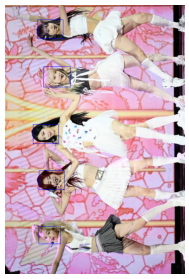

 30%|███       | 9/30 [00:12<00:27,  1.33s/it]

img-set-1/administration-adults-city-175697-2-1-2.jpg


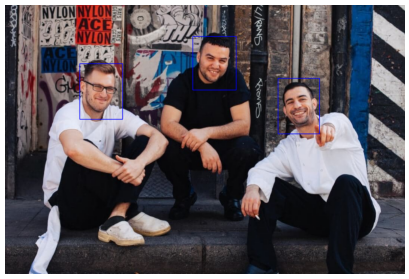

 33%|███▎      | 10/30 [00:12<00:23,  1.16s/it]

img-set-1/istockphoto-1344872631-612x612.jpg


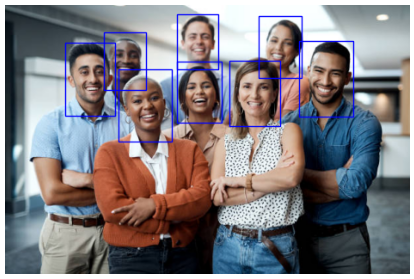

 37%|███▋      | 11/30 [00:13<00:18,  1.03it/s]

img-set-1/shadow-photo-african-mother-baby-ethiopian-young-holding-her-days-old-little-against-dark-background-199283662.jpg.webp


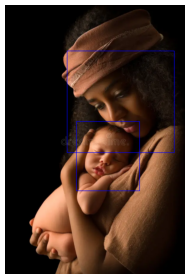

 40%|████      | 12/30 [00:14<00:15,  1.16it/s]

img-set-1/mom-dad-posing-at-baby-shower.jpg


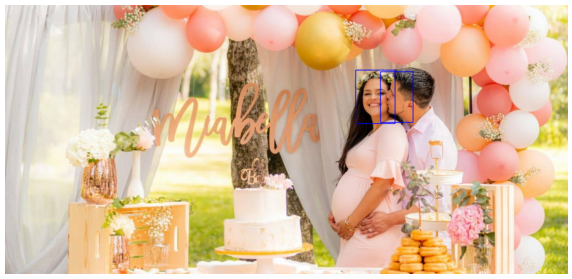

 43%|████▎     | 13/30 [00:14<00:14,  1.15it/s]

img-set-1/e168873c-ef94-4328-958f-71320228a656.jpeg.avif


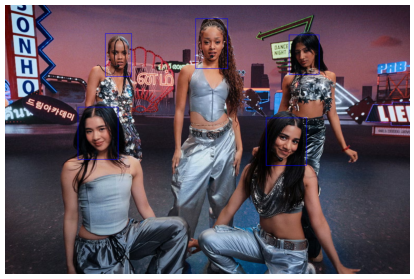

 47%|████▋     | 14/30 [00:16<00:16,  1.02s/it]

img-set-1/multicultural-love-relationships-concept-white-woman-lying-bed-with-two-dark-skinned-men-indoor-portrait_149066-2171.jpg


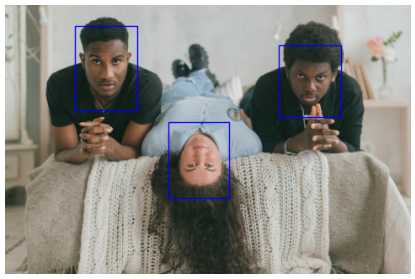

 50%|█████     | 15/30 [00:16<00:13,  1.13it/s]

img-set-1/istockphoto-1494097957-612x612-rot.jpg


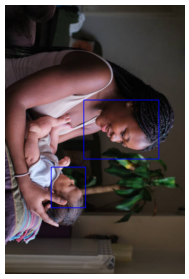

 53%|█████▎    | 16/30 [00:17<00:10,  1.31it/s]

img-set-1/istock_000020692156large_wide-56e63576304b2282f1e0bb9e178ae9343e13c944.jpg


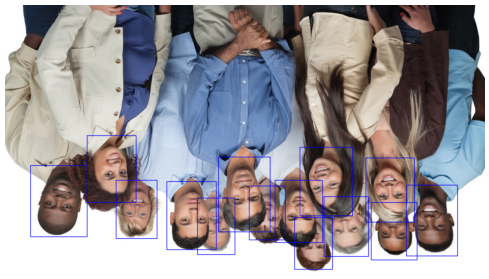

 57%|█████▋    | 17/30 [00:18<00:11,  1.11it/s]

img-set-1/LE-SSERAFIM-workout-zz-240229-6368b1.jpg


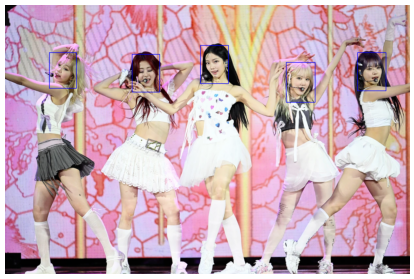

 60%|██████    | 18/30 [00:19<00:12,  1.02s/it]

img-set-1/multicultural-love-relationships-concept-white-woman-lying-bed-with-two-dark-skinned-men-indoor-portrait_149066-2171-rot.jpg


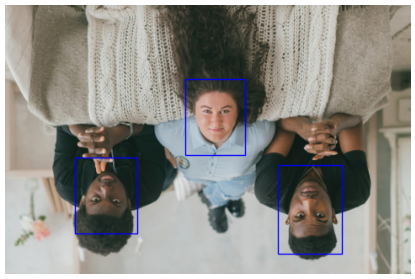

 63%|██████▎   | 19/30 [00:20<00:09,  1.11it/s]

img-set-1/shutterstock_762391612-41aca833e9184016833a754be5e7d5c3.jpg


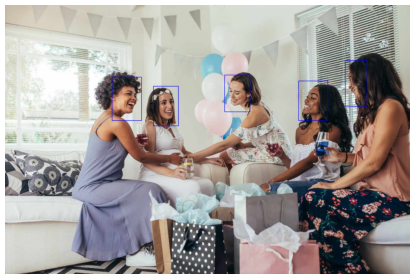

 67%|██████▋   | 20/30 [00:21<00:09,  1.05it/s]

img-set-1/premium_photo-1683707120318-8fad3fca1f13-rot.jpeg


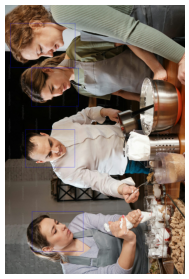

 70%|███████   | 21/30 [00:26<00:19,  2.16s/it]

img-set-1/istockphoto-1368965646-612x612.jpg


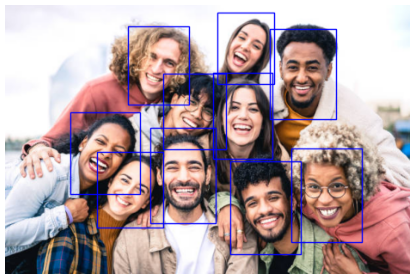

 73%|███████▎  | 22/30 [00:27<00:14,  1.81s/it]

img-set-1/people-posing-together-registration-day_23-2149096793.jpg.avif


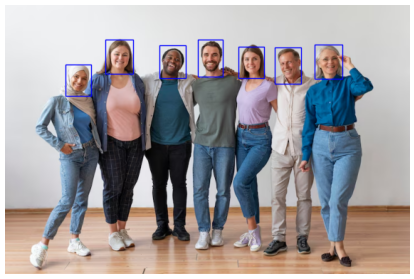

 77%|███████▋  | 23/30 [00:28<00:11,  1.60s/it]

img-set-1/group-of-people-throwing-confetti-at-a-baby-shower.jpeg


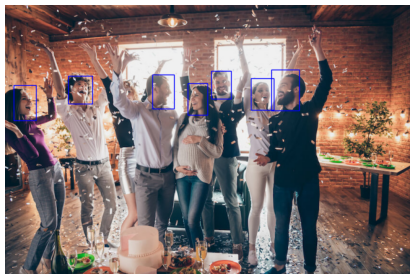

 80%|████████  | 24/30 [00:29<00:08,  1.47s/it]

img-set-1/istockphoto-1494097957-612x612.jpg


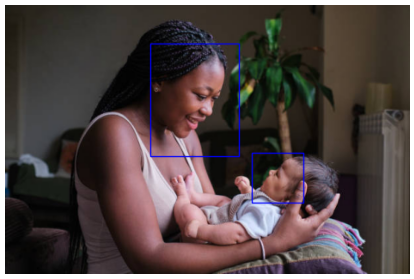

 83%|████████▎ | 25/30 [00:30<00:06,  1.32s/it]

img-set-1/premium_photo-1683707120318-8fad3fca1f13.jpeg


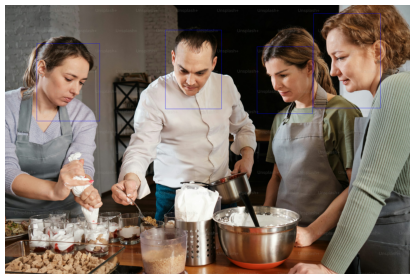

 87%|████████▋ | 26/30 [00:38<00:13,  3.34s/it]

img-set-1/539a7f6913000ccdb1a845478db06346.jpg.avif


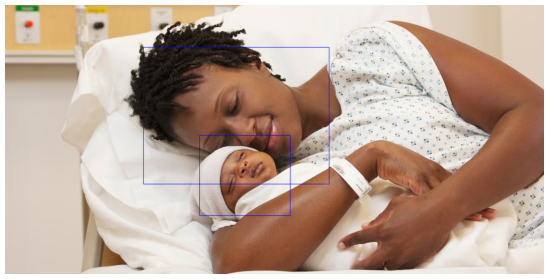

 90%|█████████ | 27/30 [00:40<00:08,  2.80s/it]

img-set-1/overjoyed-young-diverse-dancers-team-600nw-2095291132-rot copy.jpg


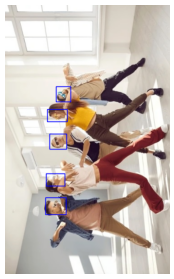

 93%|█████████▎| 28/30 [00:40<00:04,  2.11s/it]

img-set-1/full-shot-friends-partying-outdoors_23-2149009362.jpg.avif


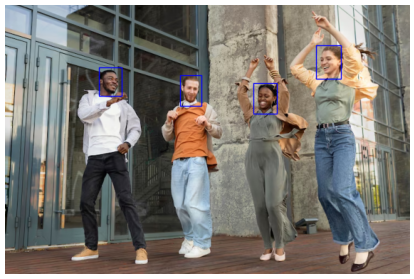

 97%|█████████▋| 29/30 [00:41<00:01,  1.67s/it]

img-set-1/627718c232c1ab1dcf847fd823051970-rot.jpg


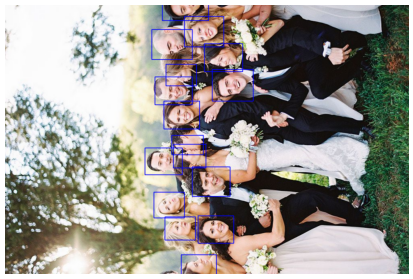

100%|██████████| 30/30 [00:42<00:00,  1.41s/it]


In [16]:
from tqdm import tqdm
import pandas as pd
import timeit

df = pd.DataFrame(columns=["image_name", "num_faces", "inference time", "bounding boxes"])

output_box_path = Path("boxed_images")
output_box_path.mkdir(exist_ok=True)
for i, img_pth in enumerate(tqdm(all_images)):
    t1 = timeit.default_timer()

    img = Image.open(img_pth)
    img = ImageOps.exif_transpose(img)
    img_array = np.array(img)

    out_annotations = model.predict_jsons(img_array, confidence_threshold=0.9)

    for i in range(len(out_annotations)):
        out_annotations[i]['bbox'] = expand_bbox(out_annotations[i]['bbox'])


    dpi=100
    h = img_array.shape[0]
    w = img_array.shape[1]
    plt.figure(figsize=(w/dpi, h/dpi), dpi=dpi)
    plt.imshow(img_array)

    bboxes = []

    for a in out_annotations:
        bbox = a['bbox']
        bboxes.append(tuple(bbox))
        xy = (bbox[0], bbox[1])
        width = int(abs(bbox[0] - bbox[2]))
        height = int(abs(bbox[1] - bbox[3]))
        rect = patch.Rectangle(xy, width, height, linewidth=1, edgecolor='b', facecolor='none')
        plt.gca().add_patch(rect)

    plt.axis(False)
    plt.savefig(output_box_path / Path(f"{img_pth.stem}.png"),
    bbox_inches='tight', pad_inches=0)
    plt.close()

    t2 = timeit.default_timer()

    dtime = t2-t1

    df.loc[len(df)] = [img_pth.name, len(out_annotations), dtime, bboxes]

    print(img_pth)
    plt.figure(figsize=(15, 7), dpi=50)
    plt.imshow(Image.open(output_box_path / Path(f"{img_pth.stem}.png")))
    plt.axis('off')
    plt.show()

df.to_csv("problem2_a.csv")
